In [65]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

EXERCISE 1. What is the normal body temperature for healthy humans? A random sample of 130 healthy human body temperatures provided by Allen Shoemaker yielded 98.25 degrees and standard deviation 0.73 degrees. 

Give a 99% confidence interval for the average body temperature of healthy people.

ALIŞTIRMA 1. Sağlıklı insanlar için normal vücut sıcaklığı nedir? Allen Shoemaker tarafından sağlanan 130 sağlıklı insan vücut sıcaklığından rastgele bir örnek 98.25 derece ve standart sapma 0.73 derece verdi.

Sağlıklı insanların ortalama vücut ısısı için %99 güven aralığı verin.

In [3]:
n = 130
mu = 98.25
s = 0.73
alpha = 0.01

In [7]:
sem = s / np.sqrt(n) # standard error of the mean
sem

0.06402523540941313

In [9]:
moe = 2.58 * sem
moe

0.1651851073562859

In [19]:
low_lim = mu - moe
up_lim = mu + moe
(low_lim, up_lim)

(98.08481489264372, 98.41518510735628)

In [21]:
stats.norm.interval(alpha=0.99, loc = mu, scale=sem)

(98.08508192246582, 98.41491807753418)

In [22]:
stats.t.interval(alpha=0.99, df=n-1, loc = mu, scale = sem)

(98.08260738705933, 98.41739261294067)

EXERCISE 2. The administrators for a hospital wished to estimate the average number of days required for inpatient treatment of patients between the ages of 25 and 34. A random sample of 500 hospital patients between these ages produced a mean and standard deviation equal to 5.4 and 3.1 days, respectively.


Construct a 95% confidence interval for the mean length of stay for the population of patients from which the sample was drawn.

ALIŞTIRMA 2. Bir hastanenin yöneticileri, 25 ila 34 yaşları arasındaki hastaların yatarak tedavisi için gereken ortalama gün sayısını tahmin etmek istediler.

Bu yaşlar arasındaki 500 hastane hastasından oluşan rastgele bir örneklem, sırasıyla 5.4 ve 3.1 güne eşit bir ortalama ve standart sapma üretti.


Örneğin alındığı hasta popülasyonu için ortalama yatış süresi için %95'lik bir güven aralığı oluşturun.

In [23]:
n = 500
mu = 5.4
s = 3.1
alpha = 0.05

In [24]:
sem = s / np.sqrt(n) # standard error of the mean
sem

0.13863621460498696

In [25]:
moe = 1.96 * sem
moe

0.27172698062577444

In [26]:
low_lim = mu - moe
up_lim = mu + moe
(low_lim, up_lim)

(5.128273019374226, 5.671726980625775)

In [28]:
stats.norm.interval(alpha=0.95, loc = mu, scale=sem)

(5.12827801242126, 5.67172198757874)

In [29]:
stats.t.interval(alpha=0.95, df=n-1, loc = mu, scale = sem)

(5.127617354510309, 5.672382645489692)

HYPOTHESIS TESTING

EXERCISE 3. The hourly wages in a particular industry are normally distributed with mean \\$13.20 and standard deviation $2.50. A company in this industry employs 40 workers, paying them an average of \\$12.20 per hour. Can this company be accused of paying substandard wages? Use an α = .01 level test. (Wackerly, Ex.10.18)

CHECK: statistic: -2.5298221281347035, pvalue= 0.005706018193000826

HİPOTEZ TESTİ

ALIŞTIRMA 3. Belirli bir sektördeki saatlik ücretler ortalama 13.20\\$ ve standart sapma 2.50\\$ ile normal olarak dağıtılır. Bu sektördeki bir şirket, 40 işçi çalıştırıyor ve onlara saatte ortalama 12,20 dolar ödüyor. Bu şirket standartların altında ücret ödemekle suçlanabilir mi? α = .01 seviye testi kullanın. (Wackerly, Ör.10.18)

KONTROL: istatistik: -2,5298221281347035, pdeğer= 0,005706018193000826

In [ ]:
# H0: mu = 12.20
# H1: mu < 12.20

In [57]:
xbar = 12.20
s = 2.50
n = 40
alpha = 0.01

In [58]:
s / np.sqrt(n)

0.3952847075210474

In [141]:
# Calculate the test statistic
t_test = (xbar - 13.20)/(s/np.sqrt(n))
t_test

-2.5298221281347035

In [148]:
# Calculate p-value
pvalue = stats.t.cdf(t_test, 39)
pvalue

0.0077816812266594355

In [149]:
# Compare p-value and alpha
alpha = 0.05

if pvalue < alpha:
    print("Reject the null")
else:
    print("Fail to reject the null")

Reject the null


EXERCISE 4.Shear strength measurements derived from unconfined compression tests for two types of soils gave the results shown in the following document (measurements in tons per square foot). Do the soils appear to differ with respect to average shear strength, at the 1% significance level?

Results for two type of soils

CHECK: statistic: 5.1681473319343345, pvalue= 2.593228732352821e-06

ALIŞTIRMA 4. İki tür zemin için serbest sıkıştırma testlerinden elde edilen kayma mukavemeti ölçümleri, aşağıdaki belgede gösterilen sonuçları verdi (ölçümler, ton/ayak kare olarak). Zeminler, %1 anlamlılık düzeyinde, ortalama kayma mukavemetine göre farklılık gösteriyor mu?

İki tür toprak için sonuçlar

KONTROL: istatistik: 5,1681473319343345, pdeğeri= 2,593228732352821e-06

In [150]:
df = pd.read_csv("soil.csv")
df.dropna(inplace=True)

In [151]:
pairedtest = stats.ttest_rel(df.Soil1, df.Soil2)
pairedtest

Ttest_relResult(statistic=5.309754126390885, pvalue=1.0725240883541837e-05)

In [110]:
pairedtest.pvalue

1.0725240883541837e-05

In [108]:
# Compare p-value and alpha
alpha = 0.01

if pairedtest.pvalue < alpha:
    print("Reject the null")
else:
    print("Fail to reject the null")

Reject the null


In [96]:
indTest = stats.ttest_ind(df.Soil1, df.Soil2, alternative='greater')
indTest

Ttest_indResult(statistic=5.134893443609086, pvalue=1.7201023218168238e-06)

EXERCISE 5. The following dataset is based on data provided by the World Bank (https://datacatalog.worldbank.org/dataset/education-statistics). World Bank Edstats.  2015 PISA Test Dataset

Get descriptive statistics (the central tendency, dispersion and shape of a dataset’s distribution) for each continent group (AS, EU, AF, NA, SA, OC).
Determine whether there is any difference (on the average) for the math scores among European (EU) and Asian (AS) countries (assume normality and equal variances). Draw side-by-side box plots.
CHECK: statistic=0.870055317967983, pvalue=0.38826888111307345

ALIŞTIRMA 5. Aşağıdaki veri seti, Dünya Bankası tarafından sağlanan verilere dayanmaktadır (https://datacatalog.worldbank.org/dataset/education-statistics). Dünya Bankası Edstats. 2015 PISA Testi Veri Kümesi

Her kıta grubu (AS, AB, AF, NA, SA, OC) için tanımlayıcı istatistikler (bir veri kümesinin dağılımının merkezi eğilimi, dağılımı ve şekli) alın.
Avrupa (AB) ve Asya (AS) ülkeleri arasında matematik puanları arasında (ortalama olarak) herhangi bir fark olup olmadığını belirleyin (normalliği ve eşit varyansları varsayın). Yan yana kutu grafikleri çizin.
KONTROL EDİN: istatistik=0,870055317967983, pdeğer=0,38826888111307345

In [112]:
df1 = pd.read_csv("PISATest.csv")
df1

,Country Code,Continent_Code,internet_users_per_100,Math,Reading,Science
0,ALB,EU,63.252933,413.1570,405.2588,427.2250
1,ARE,AS,90.500000,427.4827,433.5423,436.7311
2,ARG,SA,68.043064,409.0333,425.3031,432.2262
3,AUS,OC,84.560519,493.8962,502.9006,509.9939
4,AUT,EU,83.940142,496.7423,484.8656,495.0375
...,...,...,...,...,...,...
65,TUN,AF,48.519836,366.8180,361.0555,386.4034
66,TUR,EU,53.744979,420.4540,428.3351,425.4895
67,URY,SA,64.600000,417.9919,436.5721,435.3630
68,USA,NaN,74.554202,469.6285,496.9351,496.2424


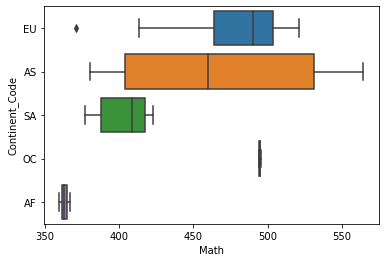

In [134]:
sns.boxplot(y = df1.Continent_Code,  x = df1.Math);

In [ ]:
from scipy.stats import f_oneway

In [153]:
anova_test = f_oneway((df1.Math[df1.Continent_Code == "AS"]), (df1.Math[df1.Continent_Code == "EU"]))
anova_test

F_onewayResult(statistic=0.7569962563243571, pvalue=0.3882688811130768)